## 时间数据可视化

- 数据处理  
  
    在图书馆文件夹下的文件中，文献来源显示为“中国图书馆学报”，发现与中国图书馆学报文件夹下的文件高度重合，故将图书馆文件夹移出了数据集。  
      
    通过正则表达式匹配出1996到2015年间每篇文章的文献来源、年卷期、关键词和被引次数，将同一期刊同一年的被引次数相加，找到出现过至少两次的最早参考文献和最新参考文献的年份，计算出参考文献的时间跨度。

In [15]:
import os #遍历文件夹
import re #文本匹配
path='.\\第二次个人作业数据集'
files=os.listdir(path) #期刊名
outfile_name=(path+'\\时间可视化数据.csv')
outfile2_name=(path+'\\时间可视化数据2.csv')
outfile=open(outfile_name,'w',encoding='utf-8')
outfile.write('学报'+','+'年卷期'+','+'被引次数'+','+'最早参考'+','+'最新参考'+'\n')
outfile.close()
outfile2=open(outfile2_name,'w',encoding='utf-8')
outfile2.write('年份'+','+'关键词'+','+'出现次数'+'\n')
outfile2.close()
word_count_2001,word_count_2002,word_count_2003,word_count_2004,word_count_2005,word_count_2006,word_count_2007,word_count_2008,word_count_2009,word_count_2010={},{},{},{},{},{},{},{},{},{} #关键词统计字典

#期刊下的数据集
for file in files:
    # 如果是文件夹，就遍历
    if os.path.isdir(path+'\\'+file):
        f=os.listdir(path+'\\'+file)
    else:
        continue
    year_count={} #不同年份该期刊文章被引证的次数
    year_earliest={} #不同年份该期刊文章参考文献的最早时间
    year_latest={} #不同年份该期刊文章被参考文献的最新时间
    # 遍历数据集
    for txt in f: 
        t=open(path+'\\'+file+'\\'+txt,'r',encoding='utf-8')
        string=t.readlines()
        for line in string:
            if len(re.findall(r'年卷期\$\$([0-9]+)',line))!=0 and 2016>int(re.findall(r'年卷期\$\$([0-9]+)',line)[0])>1995:
                year=re.findall(r'年卷期\$\$([0-9]+)',line) #一篇文章的年卷期
                m=int(year[0]) #以年卷期作为中介值
                n=int(year[0])
            else:
                pass
            if len(re.findall(r',([0-9]{4}),',line))!=0 and '\$' not in line:
                year_rf=int(re.findall(r',([0-9]{4}),',line)[0]) #一篇文章被参考或引证的时间
                # 如果时间早于年卷期，则认为是参考文献
                if 1900<year_rf<int(year[0]):
                    # 该年文章参考的最早文献，如果出现超过就记入
                    if year[0] in year_earliest.keys():
                        if year_rf==m:
                            year_earliest[year[0]]=year_rf #如果该年份出现第二次，更新记录
                        elif year_rf<year_earliest[year[0]]:
                            m=year_rf #如果出现一次早于记录的年份，更新中介值
                        else:
                            pass
                    else:
                        year_earliest[year[0]]=year_rf
                    # 参考的最新文献，如果出现两次就记入，原理同上
                    if year[0] in year_latest.keys():
                        if year_rf==n:
                            year_latest[year[0]]=year_rf
                        elif year_rf>year_latest[year[0]]:
                            n=year_rf
                        else:
                            pass
                    else:
                        year_latest[year[0]]=year_rf
                else:
                    pass
            else:
                pass
            if len(re.findall(r'被引频次\$\$([0-9]+)',line))!=0:
                refered_count=int(re.findall(r'被引频次\$\$([0-9]+)',line)[0]) #一篇文章的被引频次
                # 把该年单篇文章的被引频次加起来
                if year[0] in year_count.keys():
                    year_count[year[0]]+=refered_count
                else:
                    year_count[year[0]]=refered_count
            else:
                pass
            
            # 不分期刊，统计2001-2010十年关键词的出现次数
            if len(re.findall(r'关键词\$\$(.*?)\$\$',line))!=0:
                wordlist=re.findall(r'关键词\$\$(.*?)\$\$',line)
                word=wordlist[0].split(',')
                word.remove('')
                for w in word:
                    if re.findall(r'年卷期\$\$([0-9]+)',line)[0]=='2001':
                        if w in word_count_2001.keys():
                            word_count_2001[w]+=1
                        else:
                            word_count_2001[w]=1
                    if re.findall(r'年卷期\$\$([0-9]+)',line)[0]=='2002':
                        if w in word_count_2002.keys():
                            word_count_2002[w]+=1
                        else:
                            word_count_2002[w]=1
                    if re.findall(r'年卷期\$\$([0-9]+)',line)[0]=='2003':
                        if w in word_count_2003.keys():
                            word_count_2003[w]+=1
                        else:
                            word_count_2003[w]=1
                    if re.findall(r'年卷期\$\$([0-9]+)',line)[0]=='2004':
                        if w in word_count_2004.keys():
                            word_count_2004[w]+=1
                        else:
                            word_count_2004[w]=1
                    if re.findall(r'年卷期\$\$([0-9]+)',line)[0]=='2005':
                        if w in word_count_2005.keys():
                            word_count_2005[w]+=1
                        else:
                            word_count_2005[w]=1
                    if re.findall(r'年卷期\$\$([0-9]+)',line)[0]=='2006':
                        if w in word_count_2006.keys():
                            word_count_2006[w]+=1
                        else:
                            word_count_2006[w]=1
                    if re.findall(r'年卷期\$\$([0-9]+)',line)[0]=='2007':
                        if w in word_count_2007.keys():
                            word_count_2007[w]+=1
                        else:
                            word_count_2007[w]=1
                    if re.findall(r'年卷期\$\$([0-9]+)',line)[0]=='2008':
                        if w in word_count_2008.keys():
                            word_count_2008[w]+=1
                        else:
                            word_count_2008[w]=1
                    if re.findall(r'年卷期\$\$([0-9]+)',line)[0]=='2009':
                        if w in word_count_2009.keys():
                            word_count_2009[w]+=1
                        else:
                            word_count_2009[w]=1
                    if re.findall(r'年卷期\$\$([0-9]+)',line)[0]=='2010':
                        if w in word_count_2010.keys():
                            word_count_2010[w]+=1
                        else:
                            word_count_2010[w]=1
        t.close()
    #将某一年某期刊文章被引用数、参考的最早和最晚的文章发表时间写入csv文档1    
    outfile=open(outfile_name,'a',encoding='utf-8')
    for i in year_count.keys():
        if i in year_earliest.keys() and i in year_latest.keys():
            outfile.write(file+','+i+','+'%d'%year_count[i]+','+'%d'%year_earliest[i]+','+'%d'%year_latest[i]+'\n')
outfile.close()

#将某一年前十五的高频关键词按顺序写入csv文档2
outfile2=open(outfile2_name,'a',encoding='utf-8')
for i in sorted(word_count_2001.items(),key=lambda wc:wc[1],reverse=True)[:15]:
    outfile2.write('2001'+','+i[0]+','+'%d'%i[1]+'\n')
for i in sorted(word_count_2002.items(),key=lambda wc:wc[1],reverse=True)[:15]:
    outfile2.write('2002'+','+i[0]+','+'%d'%i[1]+'\n')
for i in sorted(word_count_2003.items(),key=lambda wc:wc[1],reverse=True)[:15]:
    outfile2.write('2003'+','+i[0]+','+'%d'%i[1]+'\n')
for i in sorted(word_count_2004.items(),key=lambda wc:wc[1],reverse=True)[:15]:
    outfile2.write('2004'+','+i[0]+','+'%d'%i[1]+'\n')
for i in sorted(word_count_2005.items(),key=lambda wc:wc[1],reverse=True)[:15]:
    outfile2.write('2005'+','+i[0]+','+'%d'%i[1]+'\n')
for i in sorted(word_count_2006.items(),key=lambda wc:wc[1],reverse=True)[:15]:
    outfile2.write('2006'+','+i[0]+','+'%d'%i[1]+'\n')
for i in sorted(word_count_2007.items(),key=lambda wc:wc[1],reverse=True)[:15]:
    outfile2.write('2007'+','+i[0]+','+'%d'%i[1]+'\n')
for i in sorted(word_count_2008.items(),key=lambda wc:wc[1],reverse=True)[:15]:
    outfile2.write('2008'+','+i[0]+','+'%d'%i[1]+'\n')
for i in sorted(word_count_2009.items(),key=lambda wc:wc[1],reverse=True)[:15]:
    outfile2.write('2009'+','+i[0]+','+'%d'%i[1]+'\n')
for i in sorted(word_count_2010.items(),key=lambda wc:wc[1],reverse=True)[:15]:
    outfile2.write('2010'+','+i[0]+','+'%d'%i[1]+'\n')
outfile2.close()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取数据
df=pd.read_csv('.\\第二次个人作业数据集\\时间可视化数据.csv',header=0,encoding='utf-8')
df['区间']=df.最新参考-df.最早参考 #计算参考文献的跨度
df

,学报,年卷期,被引次数,最早参考,最新参考,区间
0,中国图书馆学报,2001,4975,1983,2000,17
1,中国图书馆学报,2000,5825,1989,1999,10
2,中国图书馆学报,2002,5617,1988,2001,13
3,中国图书馆学报,2003,4633,1991,2002,11
4,中国图书馆学报,2004,4956,1998,2003,5
...,...,...,...,...,...,...
306,现代情报,2011,3046,1986,2010,24
307,现代情报,2010,3404,1982,2009,27
308,现代情报,2009,5092,1992,2008,16
309,现代情报,2008,5943,1996,2007,11


### 甘特图  
- 选择数据完整（包含年卷期为1996-2015的文章）的六个期刊，绘制参考文献时间跨度甘特图。  
- 从图像来看，中国图书馆学报和图书情报工作期刊中文章参考的文献发表时间跨度最大，现代图书情报技术和大学图书馆学报则跨度较小。  
- 呈现结果可能与期刊的文章主题有关。如中国图书馆学报主要发表图书馆学情报学研究成果，栏目包括研究论文、综述评介等，研究涉及资料宽泛，因此参考文献时间跨度大。而现代图书情报技术更偏重创新结果，栏目包括数字图书馆、知识组织与知识管理等，涉及较新的技术，因此参考文献更具有时效性。

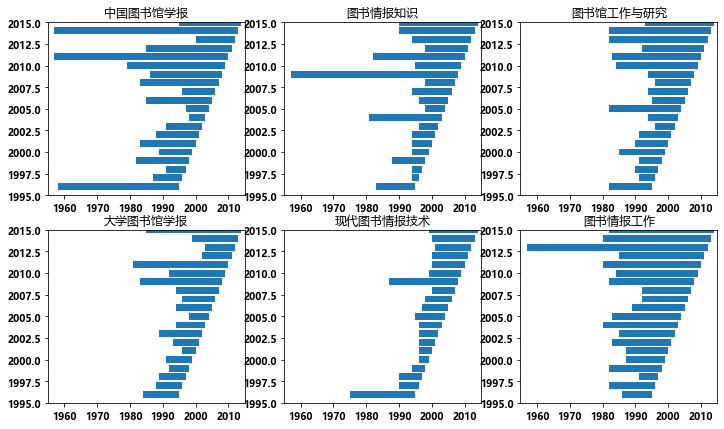

In [19]:
fig = plt.figure(figsize=(12,7)) #生成一个空的绘图窗口
plt.rc('font',family='MicroSoft YaHei',weight='bold') #中文字体显示
#设置图表位置
ax1=fig.add_subplot(2, 3, 1) 
ax2=fig.add_subplot(2, 3, 2) 
ax3=fig.add_subplot(2, 3, 3)
ax4=fig.add_subplot(2, 3, 4)
ax5=fig.add_subplot(2, 3, 5)
ax6=fig.add_subplot(2, 3, 6)

#输入数据
ax1.barh(df.年卷期[:20], df.区间[:20], left=df.最早参考[:20])
ax2.barh(df.年卷期[40:60], df.区间[40:60], left=df.最早参考[40:60])
ax3.barh(df.年卷期[60:80], df.区间[60:80], left=df.最早参考[60:80])
ax4.barh(df.年卷期[156:176], df.区间[156:176], left=df.最早参考[156:176])
ax5.barh(df.年卷期[271:291], df.区间[271:291], left=df.最早参考[271:291])
ax6.barh(df.年卷期[20:40], df.区间[20:40], left=df.最早参考[20:40])

#设置标题、将他们的坐标设置成相同区间，便于对比
ax1.set_title('中国图书馆学报')
ax1.axis([1955,2015,1995,2015])
ax2.set_title('图书情报知识')
ax2.axis([1955,2015,1995,2015])
ax3.set_title('图书馆工作与研究')
ax3.axis([1955,2015,1995,2015])
ax4.set_title('大学图书馆学报')
ax4.axis([1955,2015,1995,2015])
ax5.set_title('现代图书情报技术')
ax5.axis([1955,2015,1995,2015])
ax6.set_title('图书情报工作')
ax6.axis([1955,2015,1995,2015])
plt.savefig(r'gantt.jpg')
plt.show() #绘制图像

### Timeline  
- 2001至2010年的高频关键词排序变化时间线。
- 从图像可知，“图书馆”连续十年是出现频率最高的关键词，因为这些期刊都是图书馆学·情报学核心期刊，“数字图书馆”和“高校图书馆”几乎一直在前三，只有2010年，“公共图书馆”代替“数字图书馆”进入前三。  
- 而“网络”自2001-2007一直持下降趋势，直到2008年以“Web2.0”的概念重新获得广泛关注；随着社会发展，大众也越来越重视“服务”，诸如“读者服务”、“学科馆员”、“图书馆员”的关键词也在2006年后进入前15。  
- 这些关键词之间也可以寻找关联，随着网络的兴起，传统的公共图书馆有衰落的趋势，后来公共图书馆全面免费开放，也引发了学界的讨论。

In [4]:
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Bar, Timeline, Grid
from pyecharts.globals import ThemeType

def draw_timeline():
    # 读入数据
    df=pd.read_csv('.\\第二次个人作业数据集\\时间可视化数据2.csv',header=0,encoding='utf-8') #用pandas接入表格数据
    t=Timeline({'theme': ThemeType.MACARONS}) #设置主题
    
    for i in range(len(df)):
        if i==0 or i%15==0: #每年的第一个数据
            bar=(
                Bar(
                    init_opts=opts.InitOpts(width='500px',height='1000px') #设置图像大小
                )
                .add_xaxis(list(df.loc[i:i+14,'关键词'][::-1])) #以关键词为x轴值
                .add_yaxis(
                    '出现次数',
                    list(df.loc[i:i+14,'出现次数'][::-1]), #关键词对应的出现次数为y轴值
                    itemstyle_opts=opts.ItemStyleOpts(color='#6A5ACD')
                ) #柱体样式
                .set_global_opts(
                    title_opts=opts.TitleOpts(
                        title='%s年关键词前15'%(df.loc[i, '年份']), #设置标题
                        pos_right='10%',
                        pos_bottom='15%', #标题位置
                        title_textstyle_opts=opts.TextStyleOpts(
                            font_size=15,
                            color='#9F79EE' #标题字体和颜色
                        ),
                        subtitle='图书馆学·情报学核心期刊' #设置副标题
                    ),
                    xaxis_opts=opts.AxisOpts(
                        splitline_opts=opts.LineStyleOpts(is_show=True,opacity=1), #x轴分割线配置
                        axislabel_opts=opts.LabelOpts(color='#4169E1'), #x轴标签颜色设置
                    ),
                    yaxis_opts=opts.AxisOpts(
                        splitline_opts=opts.LineStyleOpts(is_show=True, opacity=1), #y轴分割线配置
                        axislabel_opts=opts.LabelOpts(color='#4169E1'), #y轴标签颜色设置
                    ) #坐标轴样式
                )
                .set_series_opts(
                    label_opts=opts.LabelOpts(position='right',color='#4169E1')
                )
                .reversal_axis() #坐标轴翻转
            )
            grid=(
                Grid()
                .add(bar, grid_opts=opts.GridOpts(pos_left='15%',pos_top='15%'))
            ) #组合图像位置
        else:
            continue
        t.add(grid, '{}'.format(df.loc[i, '年份'])) #根据时间组合多个图像
    t.add_schema(
        play_interval=1000, # 播放速度/间隔
        is_auto_play=True, # 自动播放
        is_loop_play=True, # 循环播放
        is_timeline_show=True, # 显示timeline组件
        itemstyle_opts=opts.ItemStyleOpts(color='#9F79EE') # timeline颜色
    )
    return t.render('timeline.html') #输出图像

draw_timeline()

'C:\\Users\\Lenovo\\Desktop\\数据可视化\\个人作业\\个人作业2\\timeline.html'

## 地理数据可视化

- 数据处理  
  
    利用jieba库提取题名中的地名，如果是地级市（即在city_dict中）就计为对应的省份，计算每个地区地名在题名中的出现次数。

In [5]:
import os #遍历文件夹
import re #文本匹配
import jieba #分析词性
import jieba.posseg as pseg
path='.\\第二次个人作业数据集'
files=os.listdir(path) #期刊名

# 将地级市名对应省份，如果题目中出现地级市名，也计入省份词频
city_dict={'河北':['石家庄','唐山','邢台','廊坊','邯郸','衡水','承德','沧州','保定','张家口','秦皇岛'], 
          '山西':['太原','晋中','晋城','忻州','朔州','临汾','运城','吕梁','阳泉','长治','大同'], 
          '内蒙古':['呼和浩特','乌兰察布','通辽','呼伦贝尔','鄂尔多斯','巴彦淖尔','包头','赤峰','乌海'], 
          '辽宁':['沈阳','辽阳','鞍山','葫芦岛','丹东','锦州','朝阳','大连','营口','铁岭','本溪','抚顺','盘锦','阜新'], 
          '吉林':['长春','白城','四平','通化','白山','松原','辽源','延边'], 
          '黑龙江':['哈尔滨','鸡西','伊春','齐齐哈尔','佳木斯','绥化','黑河','牡丹江','大庆','七台河','双鸭山','鹤岗','大兴安岭'], 
          '江苏':['南京','苏州','南通','镇江','泰州','扬州','无锡','徐州','常州','盐城','宿迁','淮安','连云港'], 
          '浙江':['杭州','衢州','丽水','宁波','绍兴','温州','嘉兴','台州','金华','湖州','舟山'], 
          '安徽':['合肥','阜阳','安庆','滁州','宣城','芜湖','蚌埠','淮南','淮北','铜陵','黄山','宿州','池州','六安','毫州','马鞍山'], 
          '福建':['福州','龙岩','三明','宁德','泉州','南平','厦门','莆田','漳州'], 
          '江西':['九江','宜春','吉安','景德镇','赣州','上饶','鹰潭','萍乡','新余','抚州'], 
          '山东':['济南','青岛','济宁','泰安','威海','德州','枣庄','聊城','滨州','潍坊','烟台','临沂','东营','日照','淄博','菏泽'], 
          '河南':['郑州','新乡','平顶山','三门峡','焦作','许昌','南阳','安阳','商丘','周口','洛阳','开封','鹤壁','信阳','濮阳','漯河','驻马店','济源'], 
          '湖北':['襄阳','荆州','宜昌','孝感','荆门','黄冈','十堰','黄石','咸宁','随州','鄂州','天门','潜江','仙桃'], 
          '湖南':['长沙','岳阳','湘潭','衡阳','邵阳','娄底','株洲','常德','郴州','益阳','怀化','永州','张家界'], 
          '广东':['江门','湛江','茂名','清远','韶关','梅州','汕尾','阳江','肇庆','揭阳','云浮','深圳','珠海','佛山','东莞','中山','汕头','惠州','潮州','河源'], 
          '广西':['南宁','防城港','梧州','崇左','来宾','玉林','百色','贵港','桂林','柳州','河池','北海','贺州','钦州'], 
          '海南':['海口','三亚','三沙','儋州','琼海','文昌','万宁','东方','五指山'], 
          '四川':['成都','德阳','乐山','绵阳','内江','南充','达州','广安','遂宁','自贡','资阳','泸州','广元','眉山','宜宾','雅安','巴中','攀枝花'], 
          '贵州':['遵义','贵阳','六盘水','铜仁','安顺','毕节'], 
          '云南':['昆明','曲靖','保山','昭通','丽江','玉溪','普洱','临沧'], 
          '西藏':['拉萨','那曲','昌都','林芝','山南','日喀则'], 
          '陕西':['西安','咸阳','渭南','榆林','延安','汉中','宝鸡','商洛','安康','铜川'], 
          '甘肃':['兰州','酒泉','平凉','天水','张掖','金昌','陇南','嘉峪关','武威','白银','庆阳','定西'], 
          '宁夏':['银川','吴忠','中卫','固原','石嘴山'], 
          '青海':['西宁','海东'], 
          '新疆':['乌鲁木齐','克拉玛依','吐鲁番','哈密','和田','喀什','塔城','阿克苏','阿勒泰','库尔勒'], 
          '台湾':['台北','新北','桃园','台中','台南','高雄','基隆','新竹','嘉义']}

# 设置初始字典
city_count_dict={'河北':0,'山西':0,'内蒙古':0,'辽宁':0,'吉林':0,'黑龙江':0,'江苏':0, 
                '浙江':0,'安徽':0,'福建':0,'江西':0,'山东':0,'河南':0,'湖北':0,'湖南':0, 
                '广东':0,'广西':0,'海南':0,'四川':0,'贵州':0,'云南':0,'西藏':0,'陕西':0, 
                '甘肃':0,'宁夏':0,'青海':0,'新疆':0,'台湾':0,'北京':0,'天津':0,'重庆':0, 
                '上海':0,'香港':0,'澳门':0}

for file in files:
    # 如果是文件夹，就遍历
    if os.path.isdir(path+'\\'+file):
        f=os.listdir(path+'\\'+file)
    else:
        continue
    for txt in f: 
        t=open(path+'\\'+file+'\\'+txt,'r',encoding='utf-8')
        string=t.readlines()
        for line in string:
            # 对题名作词性分析
            if len(re.findall(r'题名\$\$(.*?),\$',line))!=0:
                # 删掉题目中出现的省和市字，因为词性分析时不会切分地名和省市
                sts=re.findall(r'题名\$\$(.*?),\$',line)[0].replace('省','')
                sts=sts.replace('市','')
                word_gen=pseg.cut(sts)
                for one in word_gen:
                    word=one.word
                    flag=one.flag
                    # 将地名计入统计字典
                    if 'ns' in flag:
                        for i in city_dict.keys():
                            if word==i or word in city_dict[i]:
                                city_count_dict[i]+=1

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 0.580 seconds.
Prefix dict has been built successfully.


In [6]:
city_count_dict

{'河北': 55,
 '山西': 31,
 '内蒙古': 19,
 '辽宁': 51,
 '吉林': 135,
 '黑龙江': 188,
 '江苏': 207,
 '浙江': 309,
 '安徽': 44,
 '福建': 52,
 '江西': 32,
 '山东': 81,
 '河南': 68,
 '湖北': 76,
 '湖南': 57,
 '广东': 605,
 '广西': 28,
 '海南': 57,
 '四川': 308,
 '贵州': 22,
 '云南': 53,
 '西藏': 12,
 '陕西': 92,
 '甘肃': 39,
 '宁夏': 154,
 '青海': 20,
 '新疆': 22,
 '台湾': 90,
 '北京': 0,
 '天津': 0,
 '重庆': 0,
 '上海': 0,
 '香港': 0,
 '澳门': 0}

### 区域数据
- 在地图中显示地名在文章题目中出现的频率。
- 广东、浙江和四川地名出现的次数最多，东北一带也常被提及，从图中可见，西北地区在题名中的出现次数少，数据多集中在东北至南方，与人口分布的东西分界线基本吻合。
- 比较出乎我意料的是，四个直辖市的数据都是0，这是值得进一步探究的问题。

In [9]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.globals import ThemeType

def draw_map():
    c=(
        Map()
        .add('出现次数',[list(d) for d in list(city_count_dict.items())],'china')
        .set_global_opts(
            title_opts=opts.TitleOpts(title='地名在文章标题中的出现次数'),visualmap_opts=opts.VisualMapOpts()
        )
    )
    return c.render('titlemap.html')
draw_map()

'C:\\Users\\Lenovo\\Desktop\\数据可视化\\个人作业\\个人作业2\\titlemap.html'

- 数据处理  
  
    给每本期刊设置各自的参考文献来源字典，统计它在1996年至2015年参考其他情报学核心期刊文章的数目。  
      
    把每本期刊被参考的数目相加，作为点数据值。

In [10]:
import os #遍历文件夹
import re #文本匹配
path='.\\第二次个人作业数据集'
files=os.listdir(path) #期刊名

# 文档所需的词典列表
dictation=['中国图书馆学报','图书情报工作','图书情报知识','图书馆','图书馆工作与研究',
           '图书馆建设','图书馆杂志','图书馆理论与实践','图书馆论坛','大学图书馆学报',
           '情报学报','情报杂志','情报理论与实践','情报科学','情报资料工作',
           '现代图书情报技术','现代情报']

# 每一本期刊都有各自的参考文献来源字典
refer_dir_1,refer_dir_2,refer_dir_3,refer_dir_4,refer_dir_5,refer_dir_6,refer_dir_7,refer_dir_8,refer_dir_9,refer_dir_10,refer_dir_11,refer_dir_12,refer_dir_13,refer_dir_14,refer_dir_15,refer_dir_16,refer_dir_17,={},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}

for file in files:
    # 如果是文件夹才遍历
    if os.path.isdir(path+'\\'+file):
        f=os.listdir(path+'\\'+file)
    else:
        continue
    for txt in f: 
        t=open(path+'\\'+file+'\\'+txt,'r',encoding='utf-8')
        string=t.readlines()
        for line in string:
            if len(re.findall(r'年卷期\$\$([0-9]+)',line))!=0 and 2016>int(re.findall(r'年卷期\$\$([0-9]+)',line)[0])>1995:
                year=re.findall(r'年卷期\$\$([0-9]+)',line) #一篇文章的年卷期
                source=re.findall(r'来源\$\$(.*?),\$\$',line)[0] #一篇文章的来源
            else:
                pass
            #若匹配出的日期早于文章年卷期，就认为是文章参考文献的年卷期
            if len(re.findall(r']. (.*?),',line))!=0 and len(re.findall(r',([0-9]{4}),',line))!=0 and int(re.findall(r',([0-9]{4}),',line)[0])<int(year[0]) and '\$' not in line:
                reference=re.findall(r']. (.*?),',line)[0] 
                if reference != source and reference in dictation:
                    # 仅记录参考其他期刊的文献数目
                    if source=='大学图书馆学报':
                        if reference in refer_dir_1.keys():
                            refer_dir_1[reference]+=1
                        else:
                            refer_dir_1[reference]=1
                    elif source=='情报科学':
                        if reference in refer_dir_2.keys():
                            refer_dir_2[reference]+=1
                        else:
                            refer_dir_2[reference]=1
                    elif source=='情报理论与实践':
                        if reference in refer_dir_3.keys():
                            refer_dir_3[reference]+=1
                        else:
                            refer_dir_3[reference]=1
                    elif source=='情报学报':
                        if reference in refer_dir_4.keys():
                            refer_dir_4[reference]+=1
                        else:
                            refer_dir_4[reference]=1
                    elif source=='情报杂志':
                        if reference in refer_dir_5.keys():
                            refer_dir_5[reference]+=1
                        else:
                            refer_dir_5[reference]=1
                    elif source=='情报资料工作':
                        if reference in refer_dir_6.keys():
                            refer_dir_6[reference]+=1
                        else:
                            refer_dir_6[reference]=1
                    elif source=='图书馆工作与研究':
                        if reference in refer_dir_7.keys():
                            refer_dir_7[reference]+=1
                        else:
                            refer_dir_7[reference]=1
                    elif source=='图书馆建设':
                        if reference in refer_dir_8.keys():
                            refer_dir_8[reference]+=1
                        else:
                            refer_dir_8[reference]=1
                    elif source=='图书馆理论与实践':
                        if reference in refer_dir_9.keys():
                            refer_dir_9[reference]+=1
                        else:
                            refer_dir_9[reference]=1
                    elif source=='图书馆论坛':
                        if reference in refer_dir_10.keys():
                            refer_dir_10[reference]+=1
                        else:
                            refer_dir_10[reference]=1
                    elif source=='图书馆杂志':
                        if reference in refer_dir_11.keys():
                            refer_dir_11[reference]+=1
                        else:
                            refer_dir_11[reference]=1
                    elif source=='图书情报工作':
                        if reference in refer_dir_12.keys():
                            refer_dir_12[reference]+=1
                        else:
                            refer_dir_12[reference]=1
                    elif source=='图书情报知识':
                        if reference in refer_dir_13.keys():
                            refer_dir_13[reference]+=1
                        else:
                            refer_dir_13[reference]=1
                    elif source=='现代情报':
                        if reference in refer_dir_14.keys():
                            refer_dir_14[reference]+=1
                        else:
                            refer_dir_14[reference]=1
                    elif source=='现代图书情报技术':
                        if reference in refer_dir_15.keys():
                            refer_dir_15[reference]+=1
                        else:
                            refer_dir_15[reference]=1
                    elif source=='中国图书馆学报':
                        if reference in refer_dir_16.keys():
                            refer_dir_16[reference]+=1
                        else:
                            refer_dir_16[reference]=1


In [11]:
#被其他期刊文章参考的总数
refer_total_1=refer_dir_2['大学图书馆学报']+refer_dir_3['大学图书馆学报']+refer_dir_4['大学图书馆学报']+refer_dir_5['大学图书馆学报']+refer_dir_6['大学图书馆学报']+refer_dir_7['大学图书馆学报']+refer_dir_8['大学图书馆学报']+refer_dir_9['大学图书馆学报']+refer_dir_10['大学图书馆学报']+refer_dir_11['大学图书馆学报']+refer_dir_12['大学图书馆学报']+refer_dir_13['大学图书馆学报']+refer_dir_14['大学图书馆学报']+refer_dir_15['大学图书馆学报']+refer_dir_16['大学图书馆学报']
refer_total_2=refer_dir_1['情报科学']+refer_dir_3['情报科学']+refer_dir_4['情报科学']+refer_dir_5['情报科学']+refer_dir_6['情报科学']+refer_dir_7['情报科学']+refer_dir_8['情报科学']+refer_dir_9['情报科学']+refer_dir_10['情报科学']+refer_dir_11['情报科学']+refer_dir_12['情报科学']+refer_dir_13['情报科学']+refer_dir_14['情报科学']+refer_dir_15['情报科学']+refer_dir_16['情报科学']
refer_total_3=refer_dir_1['情报理论与实践']+refer_dir_2['情报理论与实践']+refer_dir_4['情报理论与实践']+refer_dir_5['情报理论与实践']+refer_dir_6['情报理论与实践']+refer_dir_7['情报理论与实践']+refer_dir_8['情报理论与实践']+refer_dir_9['情报理论与实践']+refer_dir_10['情报理论与实践']+refer_dir_11['情报理论与实践']+refer_dir_12['情报理论与实践']+refer_dir_13['情报理论与实践']+refer_dir_14['情报理论与实践']+refer_dir_15['情报理论与实践']+refer_dir_16['情报理论与实践']
refer_total_4=refer_dir_1['情报学报']+refer_dir_2['情报学报']+refer_dir_3['情报学报']+refer_dir_5['情报学报']+refer_dir_6['情报学报']+refer_dir_7['情报学报']+refer_dir_8['情报学报']+refer_dir_9['情报学报']+refer_dir_10['情报学报']+refer_dir_11['情报学报']+refer_dir_12['情报学报']+refer_dir_13['情报学报']+refer_dir_14['情报学报']+refer_dir_15['情报学报']+refer_dir_16['情报学报']
refer_total_5=refer_dir_1['情报杂志']+refer_dir_2['情报杂志']+refer_dir_3['情报杂志']+refer_dir_4['情报杂志']+refer_dir_6['情报杂志']+refer_dir_7['情报杂志']+refer_dir_8['情报杂志']+refer_dir_9['情报杂志']+refer_dir_10['情报杂志']+refer_dir_11['情报杂志']+refer_dir_12['情报杂志']+refer_dir_13['情报杂志']+refer_dir_14['情报杂志']+refer_dir_15['情报杂志']+refer_dir_16['情报杂志']
refer_total_6=refer_dir_1['情报资料工作']+refer_dir_2['情报资料工作']+refer_dir_3['情报科学']+refer_dir_4['情报科学']+refer_dir_5['情报资料工作']+refer_dir_7['情报科学']+refer_dir_8['情报科学']+refer_dir_9['情报科学']+refer_dir_10['情报科学']+refer_dir_11['情报科学']+refer_dir_12['情报科学']+refer_dir_13['情报科学']+refer_dir_14['情报科学']+refer_dir_15['情报科学']+refer_dir_16['情报科学']
refer_total_7=refer_dir_1['图书馆工作与研究']+refer_dir_2['图书馆工作与研究']+refer_dir_3['图书馆工作与研究']+refer_dir_4['图书馆工作与研究']+refer_dir_5['图书馆工作与研究']+refer_dir_6['图书馆工作与研究']+refer_dir_8['图书馆工作与研究']+refer_dir_9['图书馆工作与研究']+refer_dir_10['图书馆工作与研究']+refer_dir_11['图书馆工作与研究']+refer_dir_12['图书馆工作与研究']+refer_dir_13['图书馆工作与研究']+refer_dir_14['图书馆工作与研究']+refer_dir_15['图书馆工作与研究']+refer_dir_16['图书馆工作与研究']
refer_total_8=refer_dir_1['图书馆建设']+refer_dir_2['图书馆建设']+refer_dir_3['图书馆建设']+refer_dir_4['图书馆建设']+refer_dir_5['图书馆建设']+refer_dir_6['图书馆建设']+refer_dir_7['图书馆建设']+refer_dir_9['图书馆建设']+refer_dir_10['图书馆建设']+refer_dir_11['图书馆建设']+refer_dir_12['图书馆建设']+refer_dir_13['图书馆建设']+refer_dir_14['图书馆建设']+refer_dir_15['图书馆建设']+refer_dir_16['图书馆建设']
refer_total_9=refer_dir_1['图书馆理论与实践']+refer_dir_2['图书馆理论与实践']+refer_dir_3['图书馆理论与实践']+refer_dir_4['图书馆理论与实践']+refer_dir_5['图书馆理论与实践']+refer_dir_6['图书馆理论与实践']+refer_dir_7['图书馆理论与实践']+refer_dir_8['图书馆理论与实践']+refer_dir_10['图书馆理论与实践']+refer_dir_11['图书馆理论与实践']+refer_dir_12['图书馆理论与实践']+refer_dir_13['图书馆理论与实践']+refer_dir_14['图书馆理论与实践']+refer_dir_15['图书馆理论与实践']+refer_dir_16['图书馆理论与实践']
refer_total_10=refer_dir_1['图书馆论坛']+refer_dir_2['图书馆论坛']+refer_dir_3['图书馆论坛']+refer_dir_4['图书馆论坛']+refer_dir_5['图书馆论坛']+refer_dir_6['图书馆论坛']+refer_dir_7['图书馆论坛']+refer_dir_8['图书馆论坛']+refer_dir_9['图书馆论坛']+refer_dir_11['图书馆论坛']+refer_dir_12['图书馆论坛']+refer_dir_13['图书馆论坛']+refer_dir_14['图书馆论坛']+refer_dir_15['图书馆论坛']+refer_dir_16['图书馆论坛']
refer_total_11=refer_dir_1['图书馆杂志']+refer_dir_2['图书馆杂志']+refer_dir_3['图书馆杂志']+refer_dir_4['图书馆杂志']+refer_dir_5['图书馆杂志']+refer_dir_6['图书馆杂志']+refer_dir_7['图书馆杂志']+refer_dir_8['图书馆杂志']+refer_dir_9['图书馆杂志']+refer_dir_10['图书馆杂志']+refer_dir_12['图书馆杂志']+refer_dir_13['图书馆杂志']+refer_dir_14['图书馆杂志']+refer_dir_15['图书馆杂志']+refer_dir_16['图书馆杂志']
refer_total_12=refer_dir_1['图书情报工作']+refer_dir_2['图书情报工作']+refer_dir_3['图书情报工作']+refer_dir_4['图书情报工作']+refer_dir_5['图书情报工作']+refer_dir_6['图书情报工作']+refer_dir_7['图书情报工作']+refer_dir_8['图书情报工作']+refer_dir_9['图书情报工作']+refer_dir_10['图书情报工作']+refer_dir_11['图书情报工作']+refer_dir_13['图书情报工作']+refer_dir_14['图书情报工作']+refer_dir_15['图书情报工作']+refer_dir_16['图书情报工作']
refer_total_13=refer_dir_1['图书情报知识']+refer_dir_2['图书情报知识']+refer_dir_3['图书情报知识']+refer_dir_4['图书情报知识']+refer_dir_5['图书情报知识']+refer_dir_6['图书情报知识']+refer_dir_7['图书情报知识']+refer_dir_8['图书情报知识']+refer_dir_9['图书情报知识']+refer_dir_10['图书情报知识']+refer_dir_11['图书情报知识']+refer_dir_12['图书情报知识']+refer_dir_14['图书情报知识']+refer_dir_15['图书情报知识']+refer_dir_16['图书情报知识']
refer_total_14=refer_dir_1['现代情报']+refer_dir_2['现代情报']+refer_dir_3['现代情报']+refer_dir_4['现代情报']+refer_dir_5['现代情报']+refer_dir_6['现代情报']+refer_dir_7['现代情报']+refer_dir_8['现代情报']+refer_dir_9['现代情报']+refer_dir_10['现代情报']+refer_dir_11['现代情报']+refer_dir_12['现代情报']+refer_dir_13['现代情报']+refer_dir_15['现代情报']+refer_dir_16['现代情报']
refer_total_15=refer_dir_1['现代图书情报技术']+refer_dir_2['现代图书情报技术']+refer_dir_3['现代图书情报技术']+refer_dir_4['现代图书情报技术']+refer_dir_5['现代图书情报技术']+refer_dir_6['现代图书情报技术']+refer_dir_7['现代图书情报技术']+refer_dir_8['现代图书情报技术']+refer_dir_9['现代图书情报技术']+refer_dir_10['现代图书情报技术']+refer_dir_11['现代图书情报技术']+refer_dir_12['现代图书情报技术']+refer_dir_13['现代图书情报技术']+refer_dir_14['现代图书情报技术']+refer_dir_16['现代图书情报技术']
refer_total_16=refer_dir_1['中国图书馆学报']+refer_dir_2['中国图书馆学报']+refer_dir_3['中国图书馆学报']+refer_dir_4['中国图书馆学报']+refer_dir_5['中国图书馆学报']+refer_dir_6['中国图书馆学报']+refer_dir_7['中国图书馆学报']+refer_dir_8['中国图书馆学报']+refer_dir_9['中国图书馆学报']+refer_dir_10['中国图书馆学报']+refer_dir_11['中国图书馆学报']+refer_dir_12['中国图书馆学报']+refer_dir_13['中国图书馆学报']+refer_dir_14['中国图书馆学报']+refer_dir_15['中国图书馆学报']
refer_total_17=refer_dir_1['图书馆']+refer_dir_2['图书馆']+refer_dir_3['图书馆']+refer_dir_4['图书馆']+refer_dir_5['图书馆']+refer_dir_6['图书馆']+refer_dir_7['图书馆']+refer_dir_8['图书馆']+refer_dir_9['图书馆']+refer_dir_10['图书馆']+refer_dir_11['图书馆']+refer_dir_12['图书馆']+refer_dir_13['图书馆']+refer_dir_14['图书馆']+refer_dir_15['图书馆']+refer_dir_16['图书馆']
count_list=[('大学图书馆学报',refer_total_1),('情报科学',refer_total_2),('情报理论与实践',refer_total_3),('情报学报',refer_total_4),('情报杂志',refer_total_5),('情报科学',refer_total_6),('图书馆工作与研究',refer_total_7),('图书馆建设',refer_total_8),('图书馆理论与实践',refer_total_9),('图书馆论坛',refer_total_10),('图书馆杂志',refer_total_11),('图书情报工作',refer_total_12),('图书情报知识',refer_total_13),('现代情报',refer_total_14),('现代图书情报技术',refer_total_15),('中国图书馆学报',refer_total_16),('图书馆',refer_total_17)]
# 准备列表方便绘图时输入数据

#写入csv文件3
outfile3=open('.\\第二次个人作业数据集\\空间可视化数据.csv','a',encoding='utf-8')
outfile3.write('文献来源'+','+'参考期刊'+','+'数量'+'\n')
for i in refer_dir_1.keys():
    outfile3.write('大学图书馆学报'+','+i+','+'%d'%refer_dir_1[i]+'\n')
for i in refer_dir_2.keys():
    outfile3.write('情报科学'+','+i+','+'%d'%refer_dir_2[i]+'\n')
for i in refer_dir_2.keys():
    outfile3.write('情报理论与实践'+','+i+','+'%d'%refer_dir_2[i]+'\n')
for i in refer_dir_2.keys():
    outfile3.write('情报学报'+','+i+','+'%d'%refer_dir_2[i]+'\n')
for i in refer_dir_2.keys():
    outfile3.write('情报杂志'+','+i+','+'%d'%refer_dir_2[i]+'\n')
for i in refer_dir_2.keys():
    outfile3.write('情报资料工作'+','+i+','+'%d'%refer_dir_2[i]+'\n')
for i in refer_dir_2.keys():
    outfile3.write('图书馆工作与研究'+','+i+','+'%d'%refer_dir_2[i]+'\n')
for i in refer_dir_2.keys():
    outfile3.write('图书馆建设'+','+i+','+'%d'%refer_dir_2[i]+'\n')
for i in refer_dir_2.keys():
    outfile3.write('图书馆理论与实践'+','+i+','+'%d'%refer_dir_2[i]+'\n')
for i in refer_dir_2.keys():
    outfile3.write('图书馆论坛'+','+i+','+'%d'%refer_dir_2[i]+'\n')
for i in refer_dir_2.keys():
    outfile3.write('图书馆杂志'+','+i+','+'%d'%refer_dir_2[i]+'\n')
for i in refer_dir_2.keys():
    outfile3.write('图书情报工作'+','+i+','+'%d'%refer_dir_2[i]+'\n')
for i in refer_dir_2.keys():
    outfile3.write('图书情报知识'+','+i+','+'%d'%refer_dir_2[i]+'\n')
for i in refer_dir_2.keys():
    outfile3.write('现代情报'+','+i+','+'%d'%refer_dir_2[i]+'\n')
for i in refer_dir_2.keys():
    outfile3.write('现代图书情报技术'+','+i+','+'%d'%refer_dir_2[i]+'\n')
for i in refer_dir_2.keys():
    outfile3.write('中国图书馆学报'+','+i+','+'%d'%refer_dir_2[i]+'\n')
outfile3.close()

### 点线数据  
- 根据期刊的主办单位地址，在地图上添加期刊的地点，标示每个期刊被引用的次数，并绘制不同学报之间互相的引证连线。
- 这些核心期刊的主办单位也基本集中在人口分界线以东，缩略图中北京的点明显大于其他的点，是因为有很多点重合，北京是全国文化教育的中心。
- 由于《图书馆》的文献数据缺失，因此没有流向它的线，只有从它外指的线（即它作为参考文献来源）
- 这张图中的连线过于繁复，点的大小也没有根据被参考数量单独设置大小，且连线不能附加数值。

In [12]:
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.globals import ChartType, SymbolType, GeoType
import pandas as pd

geo = Geo()
# 以各个期刊的主办单位经纬度作为各自的地址，在地图中添加点
geo.add_coordinate(name="大学图书馆学报",longitude=116.181,latitude=39.592)
geo.add_coordinate(name="情报科学",longitude=125.152,latitude=43.541)
geo.add_coordinate(name="情报理论与实践",longitude=116.313,latitude=39.929)
geo.add_coordinate(name="情报学报",longitude=116.322,latitude=39.914)
geo.add_coordinate(name="情报杂志",longitude=108.971,latitude=34.231)
geo.add_coordinate(name="情报资料工作",longitude=116.320,latitude=39.976)
geo.add_coordinate(name="图书馆",longitude=113.004,latitude=28.194)
geo.add_coordinate(name="图书馆工作与研究",longitude=117.222,latitude=39.091)
geo.add_coordinate(name="图书馆建设",longitude=126.691,latitude=45.755)
geo.add_coordinate(name="图书馆理论与实践",longitude=106.242,latitude=38.493)
geo.add_coordinate(name="图书馆论坛",longitude=113.283,latitude=23.131)
geo.add_coordinate(name="图书馆杂志",longitude=121.451,latitude=31.214)
geo.add_coordinate(name="图书情报工作",longitude=116.329,latitude=39.993)
geo.add_coordinate(name="图书情报知识",longitude=114.373,latitude=30.544)
geo.add_coordinate(name="现代情报",longitude=125.380,latitude=43.862)
geo.add_coordinate(name="现代图书情报技术",longitude=116.335,latitude=39.911)
geo.add_coordinate(name="中国图书馆学报",longitude=116.330,latitude=39.950)

geo.add_schema(maptype="china")

# 为绘连线图准备空列表
dir_list=[]
# 读取所需数据，写入列表
df=pd.read_csv('.\\第二次个人作业数据集\\空间可视化数据.csv',header=0,encoding='utf-8')
for i in range(len(df.文献来源)):
    dir_list.append((df.参考期刊[i],df.文献来源[i]))

#画图
def draw_geo():
    geo=(
        Geo()
        .add_schema(maptype='china', #设置地图类型和颜色
                   itemstyle_opts=opts.ItemStyleOpts(color='#ADD8E6',border_color='#5F9EA0'))
        .add(
            '',count_list, #给各个点添加数据，即每个期刊被其他期刊引用的次数
            type_=ChartType.EFFECT_SCATTER,
            color='#2F4F4F', #设置点类型和颜色
        )
        .add(
            '参考文献', dir_list, #绘制连线
            type_=ChartType.LINES,
            color='gray', #设置线类型和颜色
            linestyle_opts=opts.LineStyleOpts(curve=0.2),
        )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False)) #隐藏连线内容
        .set_global_opts(title_opts=opts.TitleOpts(title="文献参考流向")) #设置标题
    )
    return geo.render('line.html')
draw_geo()

'C:\\Users\\Lenovo\\Desktop\\数据可视化\\个人作业\\个人作业2\\line.html'

### 附：桑基图  
- 因为pyecharts的地理连线无法给线添加数据，所以额外增加桑基图，展示文章流向的具体数值。
- 不知道是不是因为数据过于繁复，图像无法呈现，暂未找到解决方法。

In [13]:
import pyecharts.options as opts
from pyecharts.charts import Sankey
from pyecharts.globals import ChartType, SymbolType

nodes=[{'name':'大学图书馆学报'},{'name':'情报科学'},{'name':'情报杂志'},
       {'name':'情报理论与实践'},{'name':'图书馆杂志'},{'name':'图书馆理论与实践'},
      {'name':'图书馆'},{'name':'情报资料工作'},{'name':'图书馆工作与研究'},
      {'name':'情报学报'},{'name':'图书馆建设'},{'name':'图书馆论坛'},
      {'name':'图书情报工作'},{'name':'图书情报知识'},{'name':'现代情报'},
      {'name':'现代图书情报技术'},{'name':'中国图书馆学报'}]

links=[]
for i in range(len(df)):
    links.append({'source':df.参考期刊[i],'target':df.文献来源[i],'value':df.数量[i]})

def draw_sankey():
    sankey=(
        Sankey()
        .add(
            "sankey",
            nodes,
            links,
            linestyle_opt=opts.LineStyleOpts(opacity=0.2, curve=0.5, color="source"),
            label_opts=opts.LabelOpts(position="right"),
        )
    )

    return sankey.render('sankey.html')
draw_sankey()

'C:\\Users\\Lenovo\\Desktop\\数据可视化\\个人作业\\个人作业2\\sankey.html'